**Downlaod and extract data**

In [1]:
! wget -O A.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
! wget -O B.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
! wget -O C.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip
! wget -O D.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip
! wget -O E.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip

--2021-04-18 16:00:09--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘A.zip’

A.zip               100%[===================>] 564.50K  --.-KB/s    in 0.1s    

2021-04-18 16:00:09 (5.50 MB/s) - ‘A.zip’ saved [578047/578047]

--2021-04-18 16:00:09--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘B.zip’

B.zip               100%[===================>] 611.30K  --.-KB/s    in 0.1s    

2021-04-18 16:00:09 (5.42 MB/s) - ‘B.zip’ saved [

In [2]:
! mkdir A B C D E

In [4]:
! unzip /content/A.zip -d A
! unzip /content/B.zip -d B
! unzip /content/C.zip -d C
! unzip /content/D.zip -d D
! unzip /content/E.zip -d E
! rm -rf /content/A.zip
! rm -rf /content/B.zip
! rm -rf /content/D.zip
! rm -rf /content/C.zip
! rm -rf /content/E.zip

Archive:  /content/A.zip
  inflating: A/Z092.txt              
  inflating: A/Z002.txt              
  inflating: A/Z003.txt              
  inflating: A/Z004.txt              
  inflating: A/Z005.txt              
  inflating: A/Z006.txt              
  inflating: A/Z007.txt              
  inflating: A/Z008.txt              
  inflating: A/Z009.txt              
  inflating: A/Z010.txt              
  inflating: A/Z011.txt              
  inflating: A/Z012.txt              
  inflating: A/Z013.txt              
  inflating: A/Z014.txt              
  inflating: A/Z015.txt              
  inflating: A/Z016.txt              
  inflating: A/Z017.txt              
  inflating: A/Z018.txt              
  inflating: A/Z019.txt              
  inflating: A/Z020.txt              
  inflating: A/Z021.txt              
  inflating: A/Z022.txt              
  inflating: A/Z023.txt              
  inflating: A/Z024.txt              
  inflating: A/Z025.txt              
  inflating: A/Z026.txt  

In [5]:
!ls

A  B  C  D  E  sample_data


**Load and preprocess data**

In [23]:
import os

root = "/content/"
files = os.listdir()

A_path = os.path.join(root, [elem for elem in files if elem=='A'][0])
B_path = os.path.join(root, [elem for elem in files if elem=='B'][0])
C_path = os.path.join(root, [elem for elem in files if elem=='C'][0])
D_path = os.path.join(root, [elem for elem in files if elem=='D'][0])
E_path = os.path.join(root, [elem for elem in files if elem=='E'][0])

print(A_path)
print(B_path)
print(C_path)
print(D_path)
print(E_path)

/content/A
/content/B
/content/C
/content/D
/content/E


**SET A**

In [24]:
import numpy as np
from scipy.signal import butter, filtfilt


pass_band = [0.5*2/173, 40*2/173]
b, a = butter(1, pass_band, 'bandpass')

A_files = [os.path.join(A_path, path) for path in os.listdir(A_path)]

A_signals = []

for signal in A_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  A_signals.append(signal)

A_signals = np.array(A_signals)

**SET B**

In [25]:
B_files = [os.path.join(B_path, path) for path in os.listdir(B_path)]

B_signals = []

for signal in B_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  B_signals.append(signal)

B_signals = np.array(B_signals)

**SET C**

In [26]:
C_files = [os.path.join(C_path, path) for path in os.listdir(C_path)]

C_signals = []


for signal in C_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  C_signals.append(signal)

C_signals = np.array(C_signals)

**SET D**

In [27]:
D_files = [os.path.join(D_path, path) for path in os.listdir(D_path)]

D_signals = []

for signal in D_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  D_signals.append(signal)

D_signals = np.array(D_signals)

**SET E**

In [28]:
E_files = [os.path.join(E_path, path) for path in os.listdir(E_path)]

E_signals = []

for signal in E_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  E_signals.append(signal)

E_signals = np.array(E_signals)

**Prepare datasets for train**

In [29]:
print(A_signals.shape)
print(B_signals.shape)
print(C_signals.shape)
print(D_signals.shape)
print(E_signals.shape)

(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)


**CASE 6**

In [30]:
# Case 6


A_labels = np.zeros(len(A_signals))
B_labels = np.zeros(len(B_signals))

C_labels = np.ones(len(C_signals)) * 1
D_labels = np.ones(len(D_signals)) * 1

E_labels = np.ones(len(E_signals)) * 2

X = np.concatenate((A_signals, B_signals, C_signals, D_signals, E_signals), axis=0)
Y = np.concatenate((A_labels, B_labels, C_labels, D_labels, E_labels), axis=0)

from sklearn.preprocessing import LabelBinarizer

Y = LabelBinarizer().fit_transform(Y)

print(X.shape)
print(Y.shape)

(500, 4097)
(500, 3)


**Visualization**

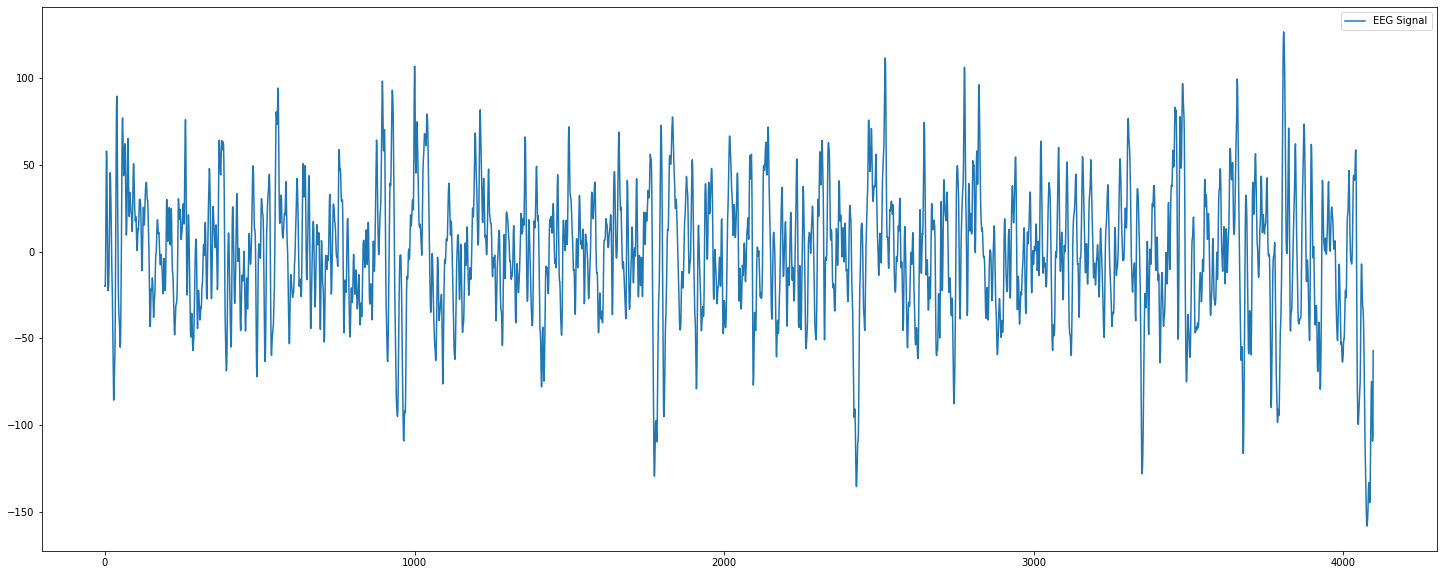

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.plot(X[0],  label = 'EEG Signal')
plt.legend()

In [32]:
X = X[:, 0:868].reshape(-1, 868, 1)
print(X.shape)
print(Y.shape)

(500, 868, 1)
(500, 3)


**Normalization**

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, 868)).reshape(-1, 868, 1)
print(X.shape)

(500, 868, 1)


**Define Model Architecture**

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 868, 1)]          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 868, 32)           256       
_________________________________________________________________
activation_5 (Activation)    (None, 868, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 217, 32)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 217, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 217, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 217, 32)           7200

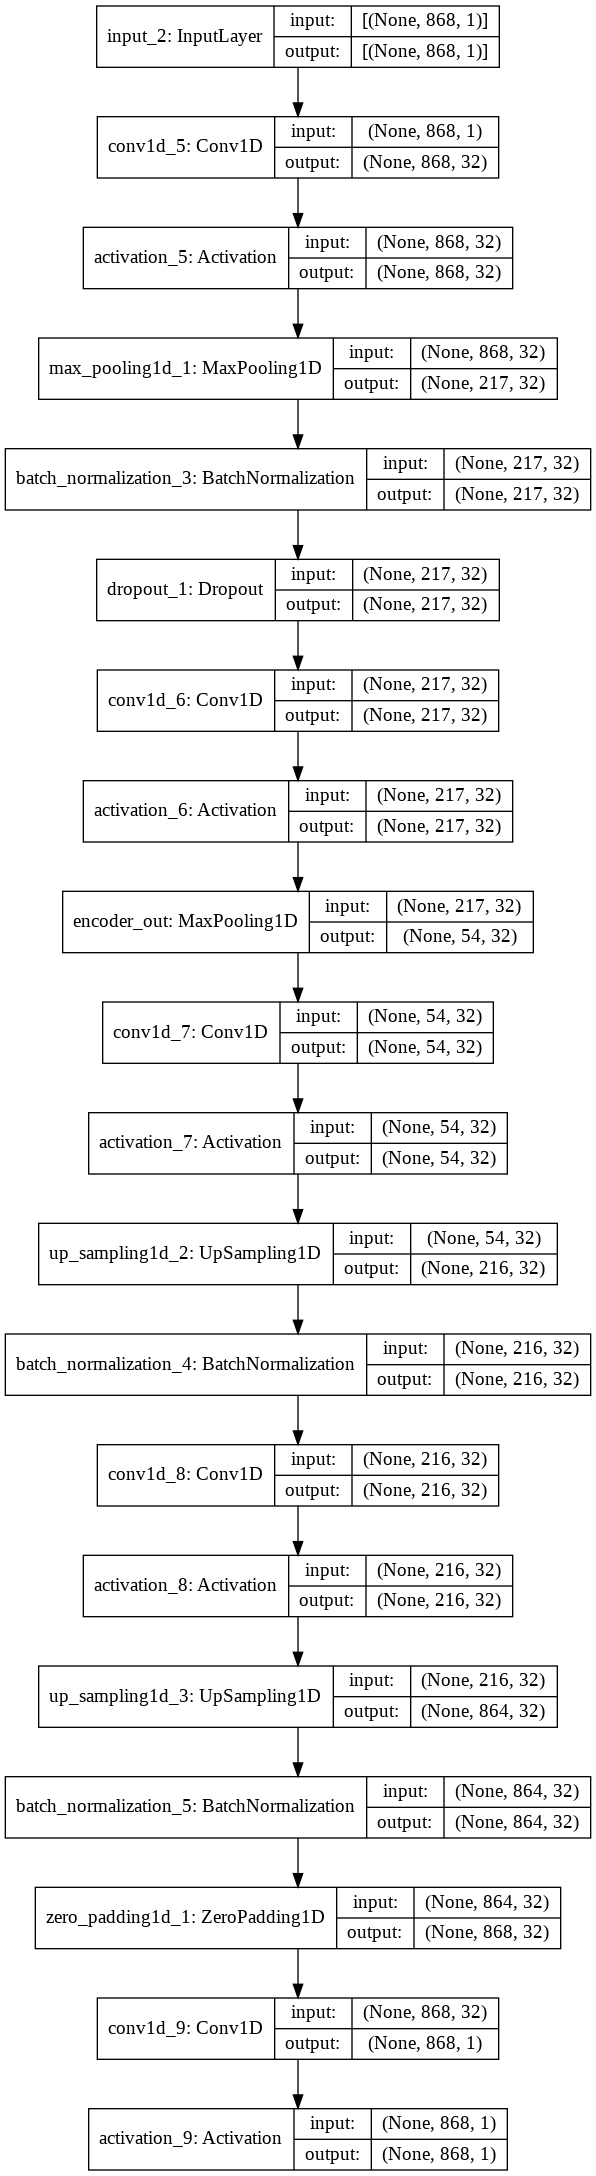

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, UpSampling1D, Activation
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.models import Model
from keras.utils import plot_model



inputs = Input(shape=(868, 1))
# ENCODER
# part 1
x = Conv1D(32, 7, padding='same', strides=1)(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)
x = Dropout(0.5)(x)
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4, name='encoder_out')(x)

# DECODER
# part 2
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = ZeroPadding1D(padding=2)(x)
x = Conv1D(1, 7, padding='same', strides=1)(x)
x = Activation('tanh')(x)

model= Model(inputs, x)

print(model.summary())
plot_model(model, show_shapes=True)

**Split dataset into train and test**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42,
                                                    shuffle=True,
                                                    stratify=np.concatenate((A_labels, B_labels, C_labels, D_labels, E_labels), axis=0))
print(X_train.shape)
print(X_test.shape)

(450, 868, 1)
(50, 868, 1)


**train the model**

In [36]:
# adadelta for autoencoder

model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, X_train, validation_data=(X_test, X_test),
                    epochs=500, batch_size=16)

Epoch 1/500
29/29 [==============================] - 5s 60ms/step - loss: 0.3611 - val_loss: 0.0589
Epoch 2/500
29/29 [==============================] - 1s 50ms/step - loss: 0.3593 - val_loss: 0.0604
Epoch 3/500
29/29 [==============================] - 1s 50ms/step - loss: 0.3613 - val_loss: 0.0602
Epoch 4/500
29/29 [==============================] - 2s 53ms/step - loss: 0.3536 - val_loss: 0.0587
Epoch 5/500
29/29 [==============================] - 2s 52ms/step - loss: 0.3497 - val_loss: 0.0577
Epoch 6/500
29/29 [==============================] - 2s 52ms/step - loss: 0.3507 - val_loss: 0.0583
Epoch 7/500
29/29 [==============================] - 1s 51ms/step - loss: 0.3479 - val_loss: 0.0606
Epoch 8/500
29/29 [==============================] - 1s 49ms/step - loss: 0.3437 - val_loss: 0.0646
Epoch 9/500
29/29 [==============================] - 1s 52ms/step - loss: 0.3479 - val_loss: 0.0699
Epoch 10/500
29/29 [==============================] - 1s 51ms/step - loss: 0.3463 - val_loss: 0.0763

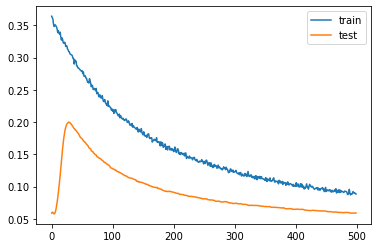

In [37]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Signal Reconstruction**

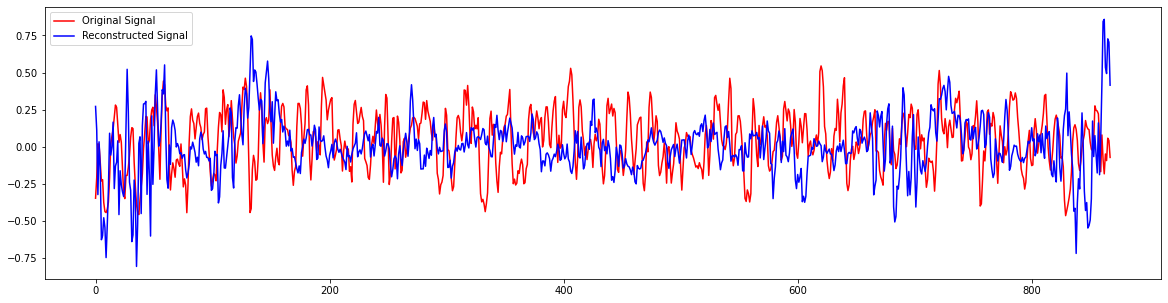

In [45]:
# plot created model output vs signal
import numpy as np

preds = model.predict(X_test)
plt.figure(figsize=(20, 5))
plt.plot(X_test[0], color='red',label = 'Original Signal')
plt.plot(preds[0], color='blue',  label = 'Reconstructed Signal')
plt.legend() 


**classification**

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 868, 1)]          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 868, 32)           256       
_________________________________________________________________
activation_5 (Activation)    (None, 868, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 217, 32)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 217, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 217, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 217, 32)           7200

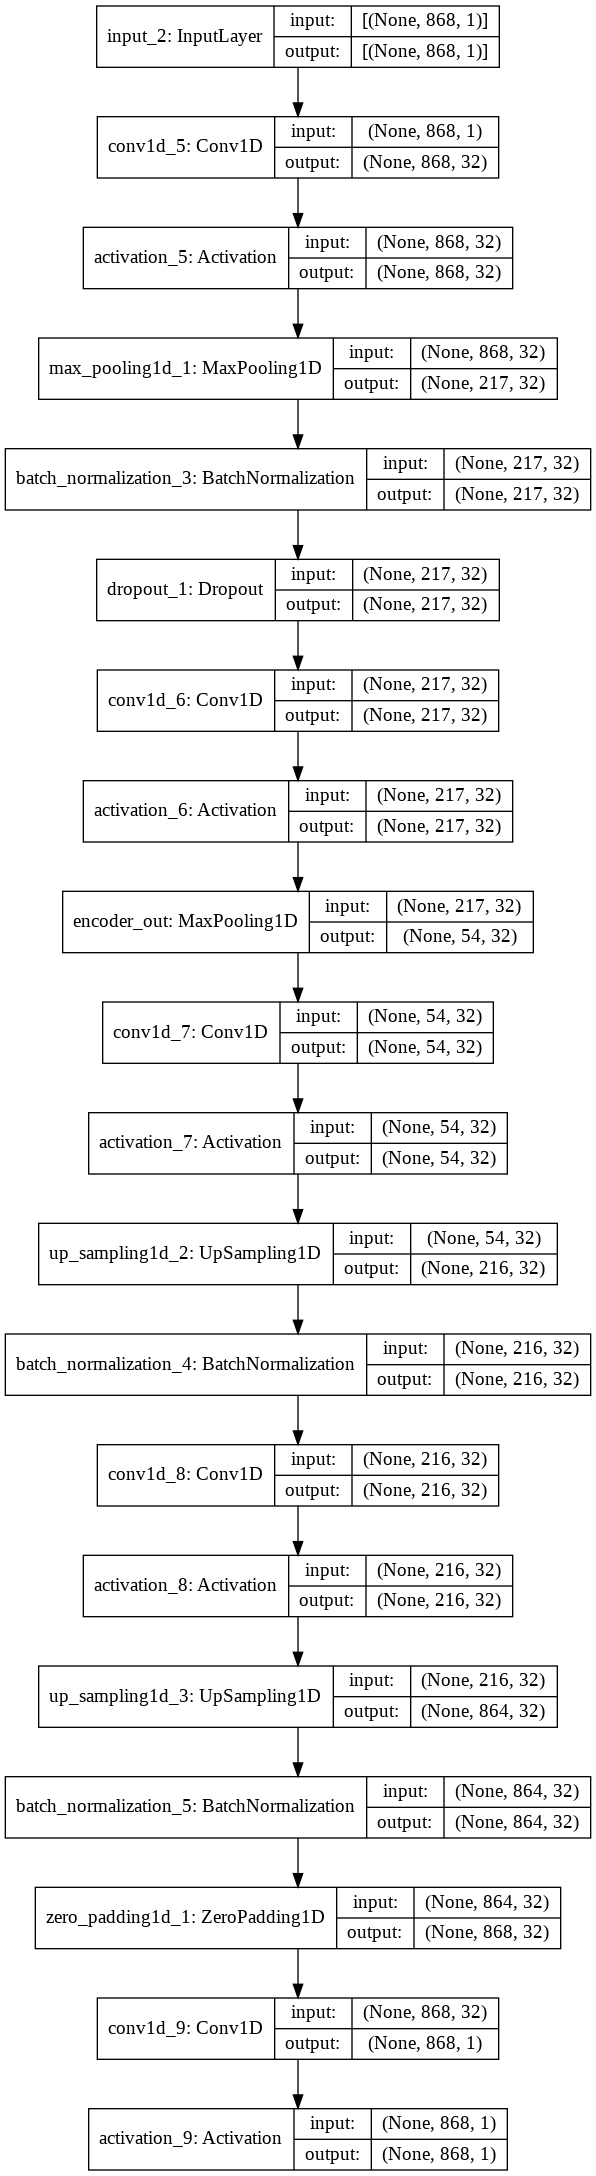

In [42]:
# classification model creation
# encoder only model.

clf_in = model.input
clf_out = [layer.output for layer in model.layers if layer.name == 'encoder_out'][0]
clf_x = Flatten()(clf_out)
clf_x = Dense(3, activation='softmax')(clf_x)
clf = tf.keras.models.Model(inputs=clf_in,
                            outputs=clf_x)
print(clf.summary())
plot_model(model, show_shapes=True)

In [40]:
# sgd for classification

clf.compile(loss='categorical_crossentropy',
            optimizer='sgd', metrics=['accuracy'])
history = clf.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=50, batch_size=16)

Epoch 1/50
29/29 [==============================] - 1s 25ms/step - loss: 2.2858 - accuracy: 0.4643 - val_loss: 3.2926 - val_accuracy: 0.4000
Epoch 2/50
29/29 [==============================] - 1s 21ms/step - loss: 1.0781 - accuracy: 0.5514 - val_loss: 1.7979 - val_accuracy: 0.4000
Epoch 3/50
29/29 [==============================] - 1s 20ms/step - loss: 0.7661 - accuracy: 0.5410 - val_loss: 1.1467 - val_accuracy: 0.4400
Epoch 4/50
29/29 [==============================] - 1s 21ms/step - loss: 0.7369 - accuracy: 0.5849 - val_loss: 1.3486 - val_accuracy: 0.4600
Epoch 5/50
29/29 [==============================] - 1s 21ms/step - loss: 0.8415 - accuracy: 0.5753 - val_loss: 0.9818 - val_accuracy: 0.5000
Epoch 6/50
29/29 [==============================] - 1s 19ms/step - loss: 0.7370 - accuracy: 0.5735 - val_loss: 0.8685 - val_accuracy: 0.5200
Epoch 7/50
29/29 [==============================] - 1s 21ms/step - loss: 0.6206 - accuracy: 0.6510 - val_loss: 0.7268 - val_accuracy: 0.5200
Epoch 8/50
29

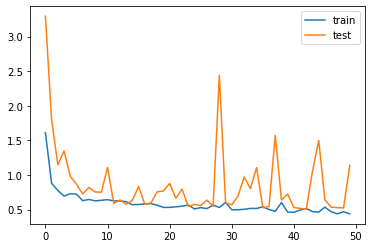

In [41]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()